# 读取并合并数据

In [2]:
import pandas as pd
import numpy as np
import glob
filenames =  glob.glob('dataset/*.csv')   # 数据文件名
data_nums = len(filenames)
data = pd.DataFrame()
data_start_point_perday = {}  # 用来记录每日数据起始点
data_num_perday = {}  # 用来记录每日数据大小
temp_start_point = 0  # 临时变量
for filename in filenames[:data_nums-1]:   # 此处留了一个用做验证
    print('='*20,'文件名称：',filename[8:-4])
    temp_data = pd.read_csv (filename)
    print("该文件数据大小为：%d 行，%d 列" % (temp_data.shape[0],temp_data.shape[1]))
    data_start_point_perday[filename[8:-4]] = temp_start_point # 记录当日数据起始点
    temp_start_point = temp_start_point + temp_data.shape[0]  # 更新起始点
    data_num_perday[filename[8:-4]] = temp_data.shape[0]       # 记录当日数据大小
    data = pd.concat([data,temp_data])
    print("与总数据合并后数据大小为：%d 行，%d 列" % (data.shape[0],data.shape[1]))

==================== 文件名称： 20181219
该文件数据大小为：22151 行，536 列
与总数据合并后数据大小为：22151 行，536 列
==================== 文件名称： 20181220
该文件数据大小为：27682 行，536 列
与总数据合并后数据大小为：49833 行，536 列
==================== 文件名称： 20181221
该文件数据大小为：26989 行，536 列
与总数据合并后数据大小为：76822 行，536 列
==================== 文件名称： 20181227
该文件数据大小为：3032 行，536 列
与总数据合并后数据大小为：79854 行，536 列
==================== 文件名称： 20181229
该文件数据大小为：1861 行，536 列
与总数据合并后数据大小为：81715 行，536 列
==================== 文件名称： 20190102
该文件数据大小为：7260 行，536 列
与总数据合并后数据大小为：88975 行，536 列
==================== 文件名称： 20190124
该文件数据大小为：6897 行，536 列
与总数据合并后数据大小为：95872 行，536 列
==================== 文件名称： 20190125
该文件数据大小为：5844 行，536 列
与总数据合并后数据大小为：101716 行，536 列
==================== 文件名称： 20190128
该文件数据大小为：14532 行，536 列
与总数据合并后数据大小为：116248 行，536 列
==================== 文件名称： 20190130
该文件数据大小为：22616 行，536 列
与总数据合并后数据大小为：138864 行，536 列


# 观察数据

 20181219 数据情况：
ok 20181219
 20181220 数据情况：
ok 20181220
 20181221 数据情况：
ok 20181221
 20181227 数据情况：
ok 20181227
 20181229 数据情况：
ok 20181229
 20190102 数据情况：
ok 20190102
 20190124 数据情况：
ok 20190124
 20190125 数据情况：
ok 20190125
 20190128 数据情况：
ok 20190128
 20190130 数据情况：
ok 20190130


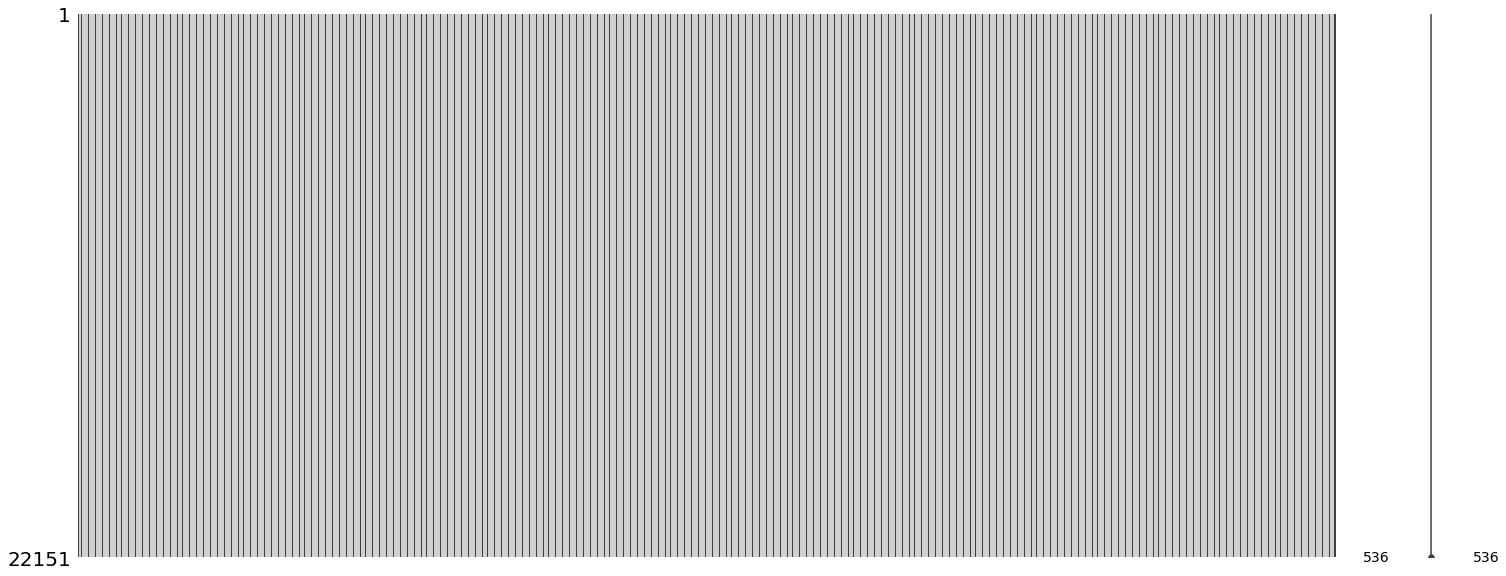

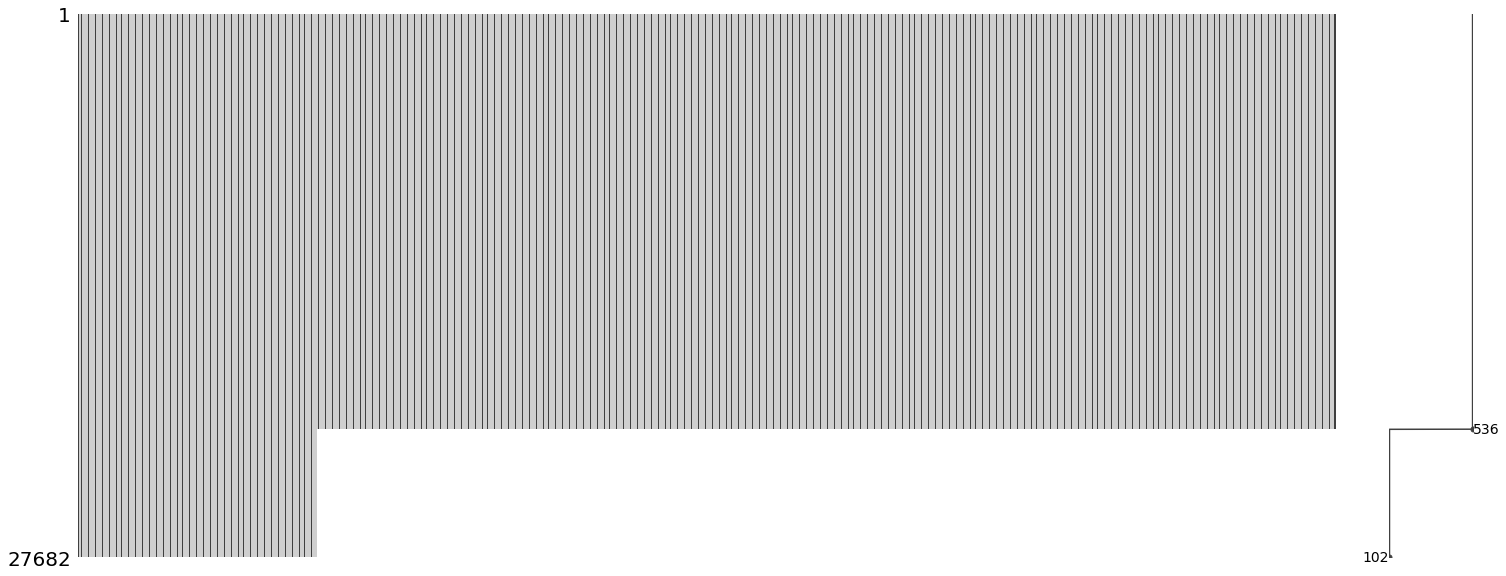

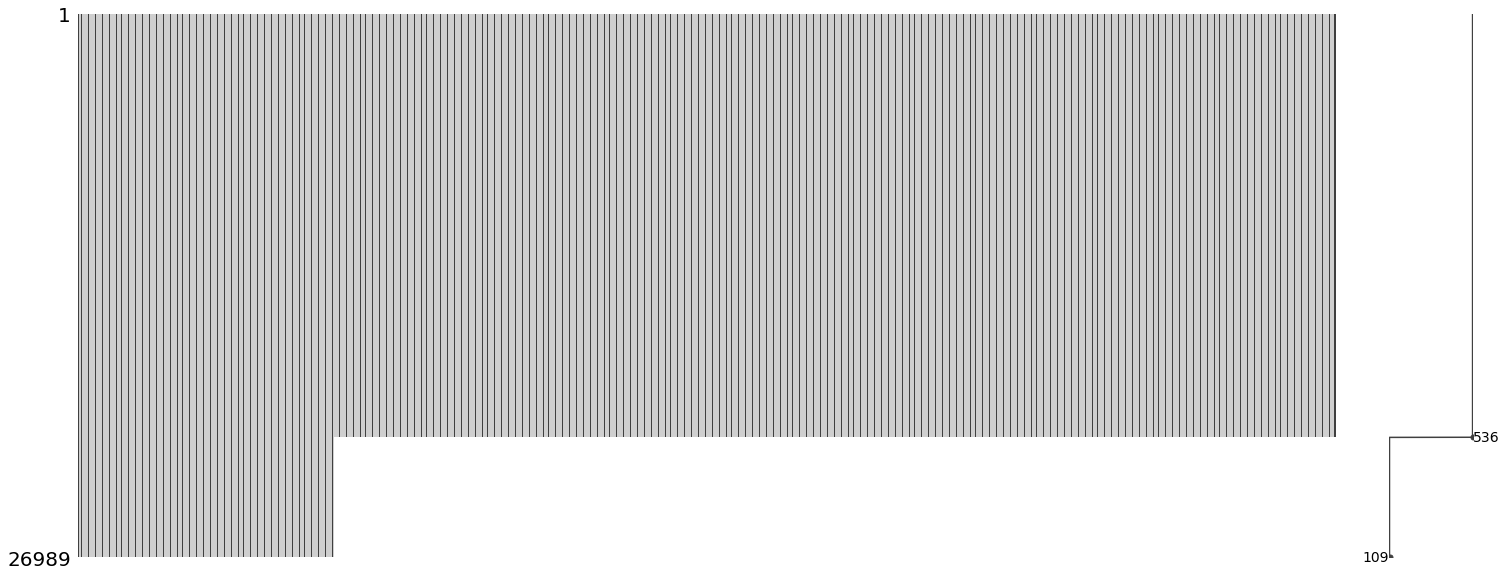

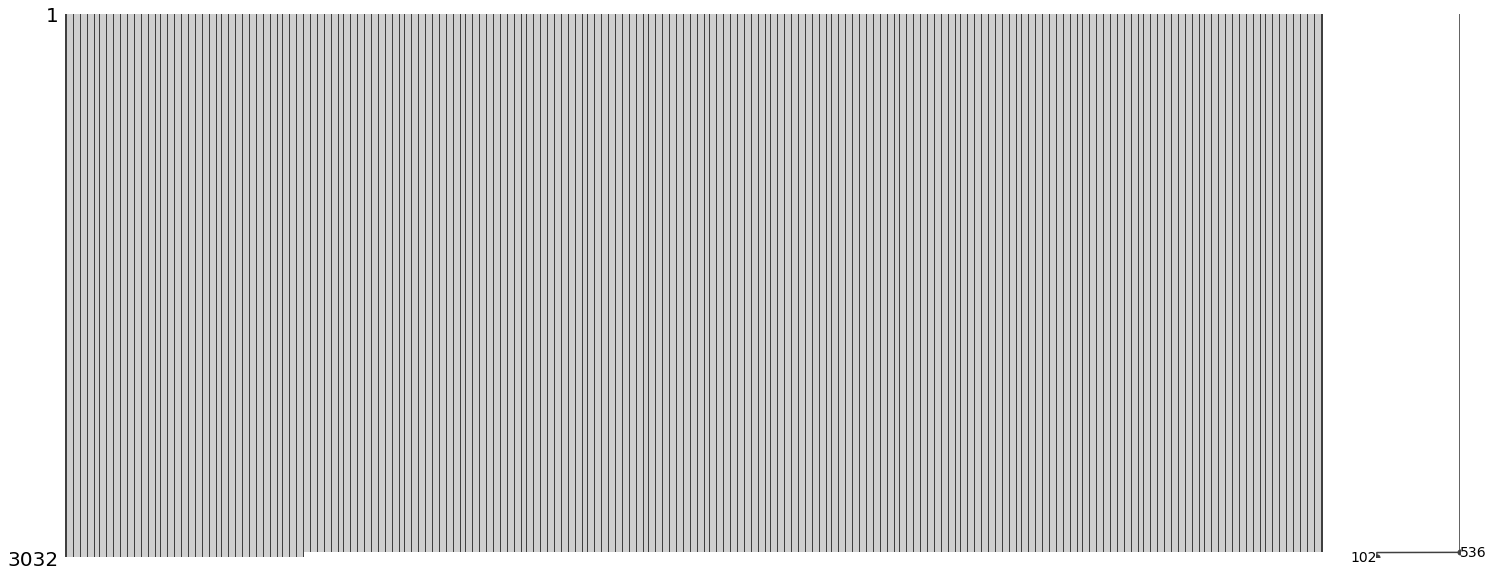

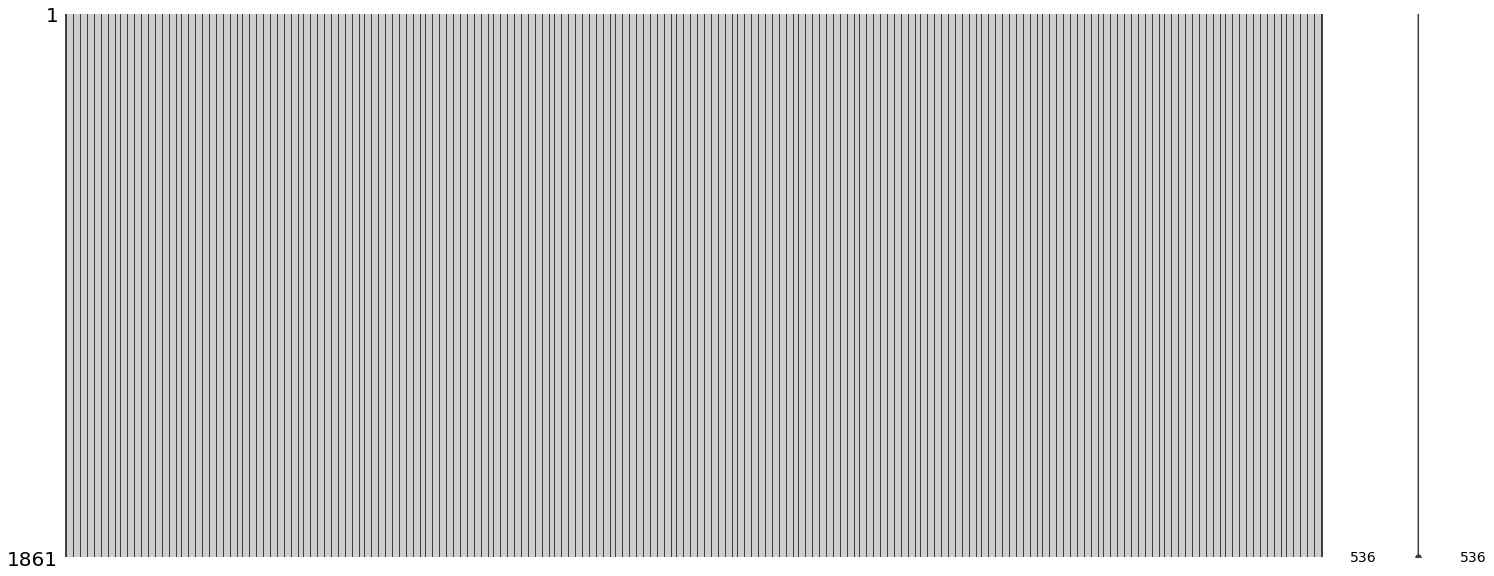

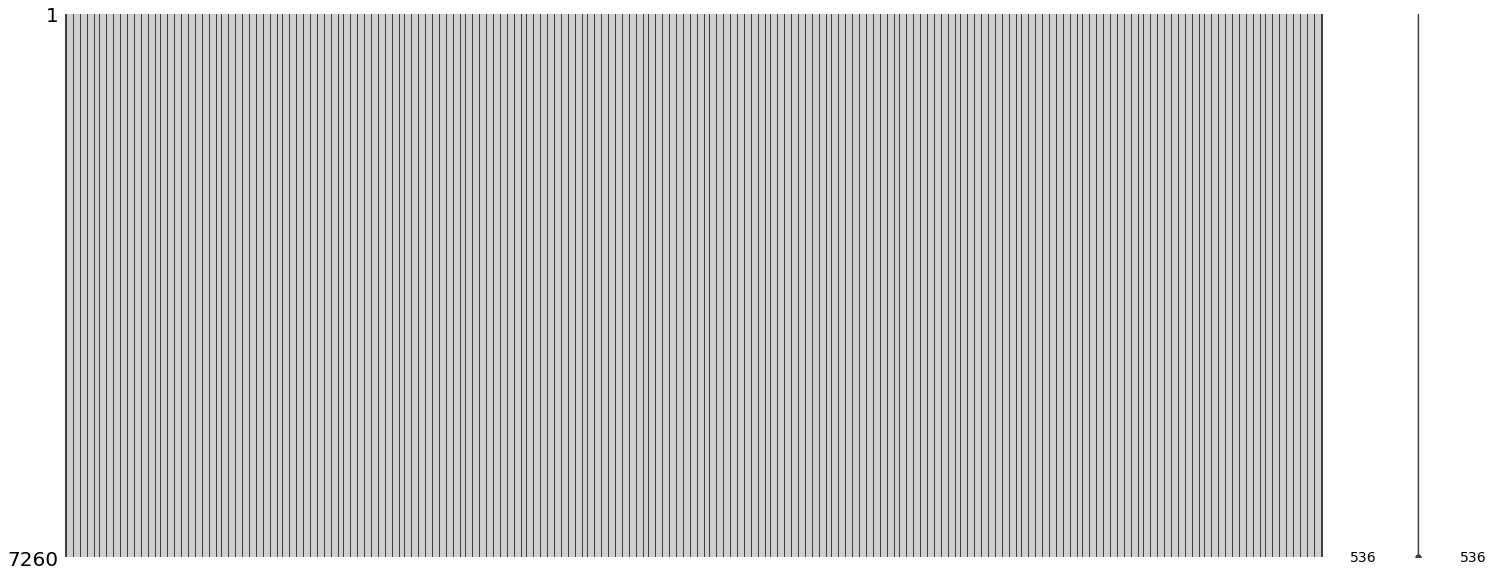

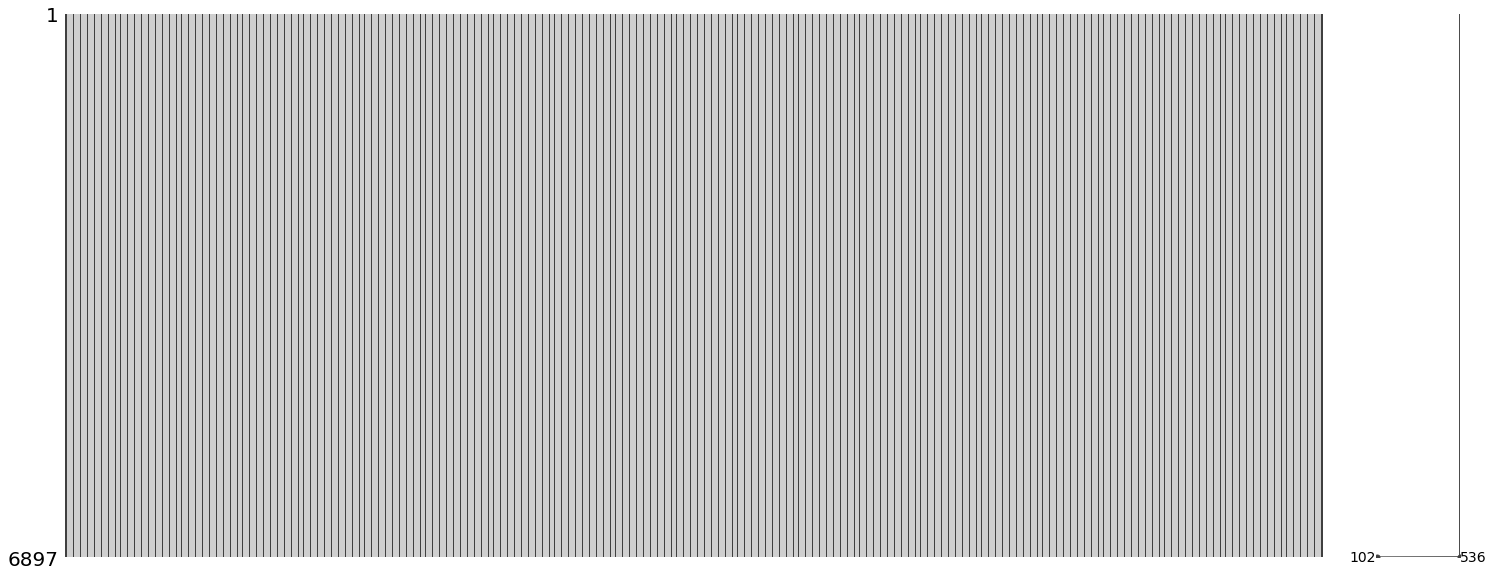

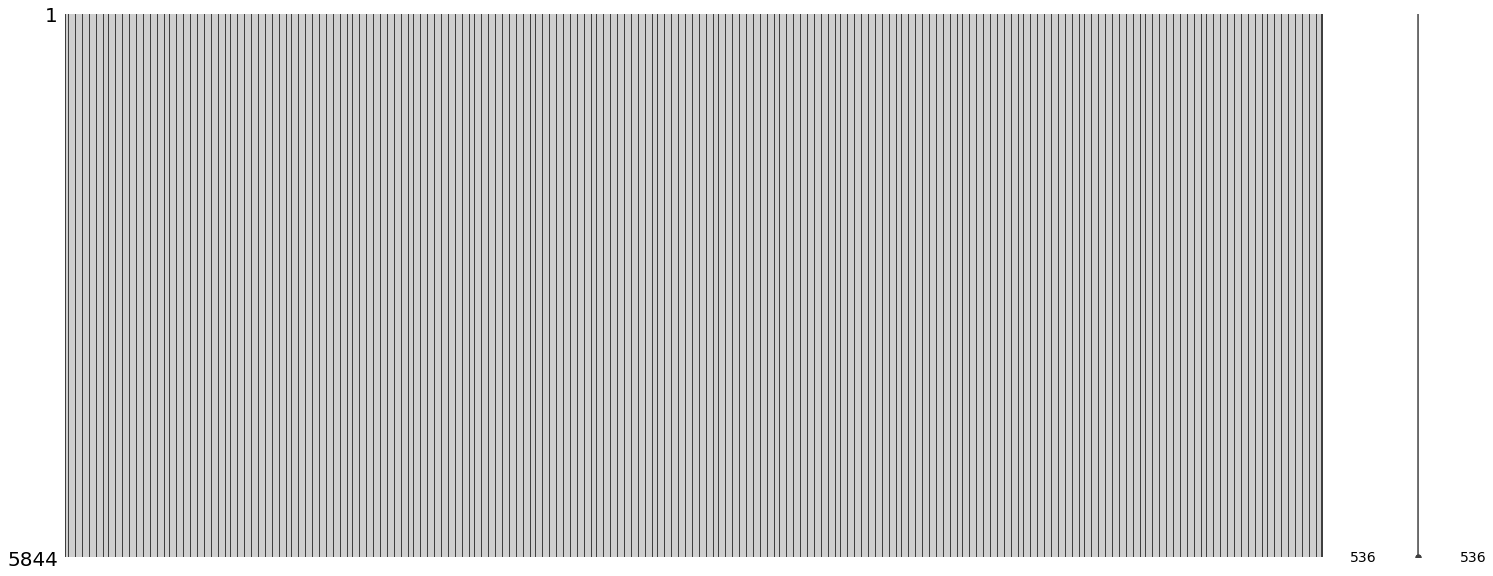

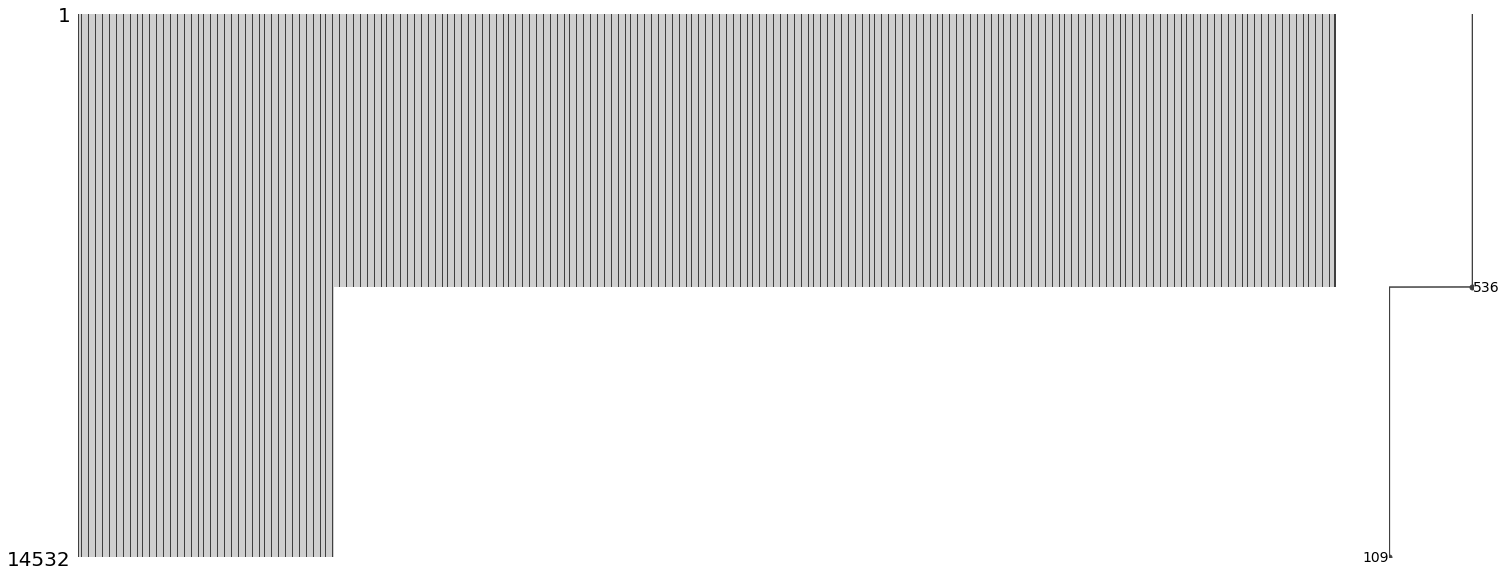

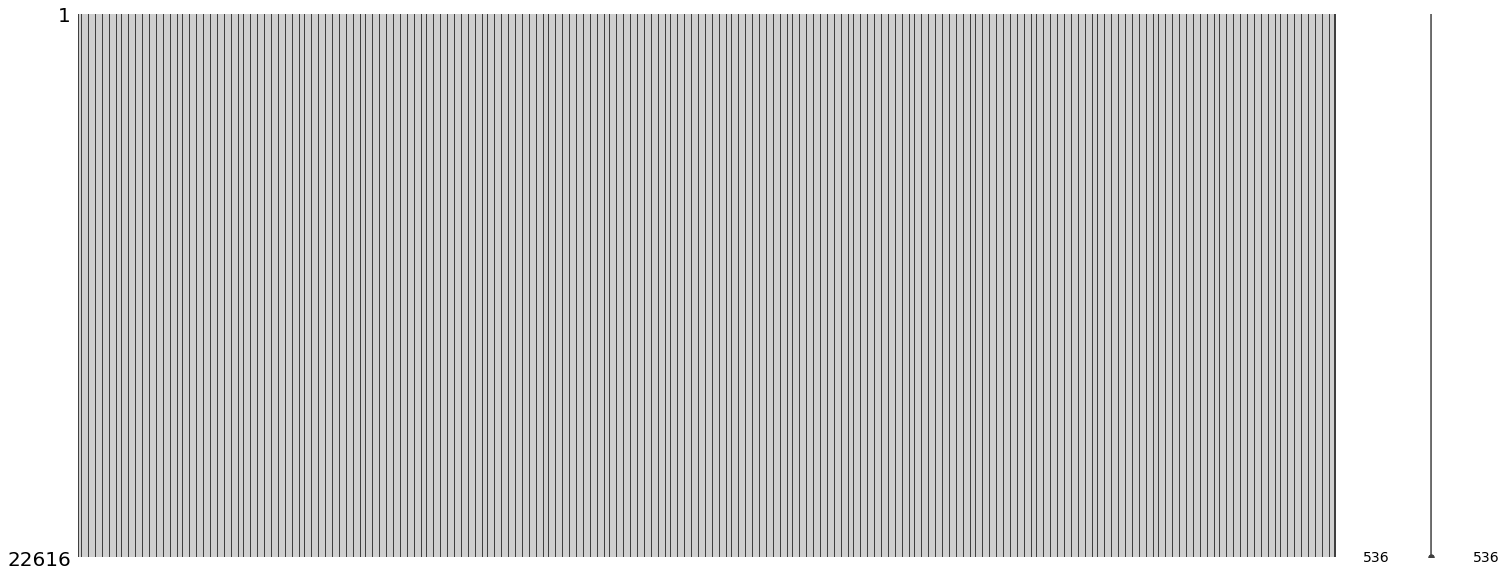

In [3]:
import missingno as msno
%matplotlib inline
for day,startpoint in data_start_point_perday.items():
    print('='*50,'\n',day,'数据情况：')
    num = data_num_perday[day]
    msno.matrix(data.iloc[startpoint:startpoint+num,:])
    print('ok',day)

Text(0.5, 1.0, '发动机转速功率对比')

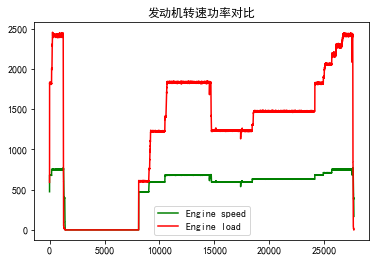

In [4]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = 'SimHei'  #指定默认字体  
plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
%matplotlib inline
startpoint = data_start_point_perday[r'20181220']
endpoint = startpoint+data_num_perday[r'20181220']
#plt.figure(1)
plt.plot(data.iloc[startpoint:endpoint,3],color='g',label='Engine speed')
plt.plot(data.iloc[startpoint:endpoint,4],color='r',label='Engine load')
plt.legend(loc='best')
plt.title("发动机转速功率对比")

# 数据规整

去除无效数据后大小为：138864 行，279 列
 20181219 数据情况：
 20181220 数据情况：
 20181221 数据情况：
 20181227 数据情况：
 20181229 数据情况：
 20190102 数据情况：
 20190124 数据情况：
 20190125 数据情况：
 20190128 数据情况：
 20190130 数据情况：


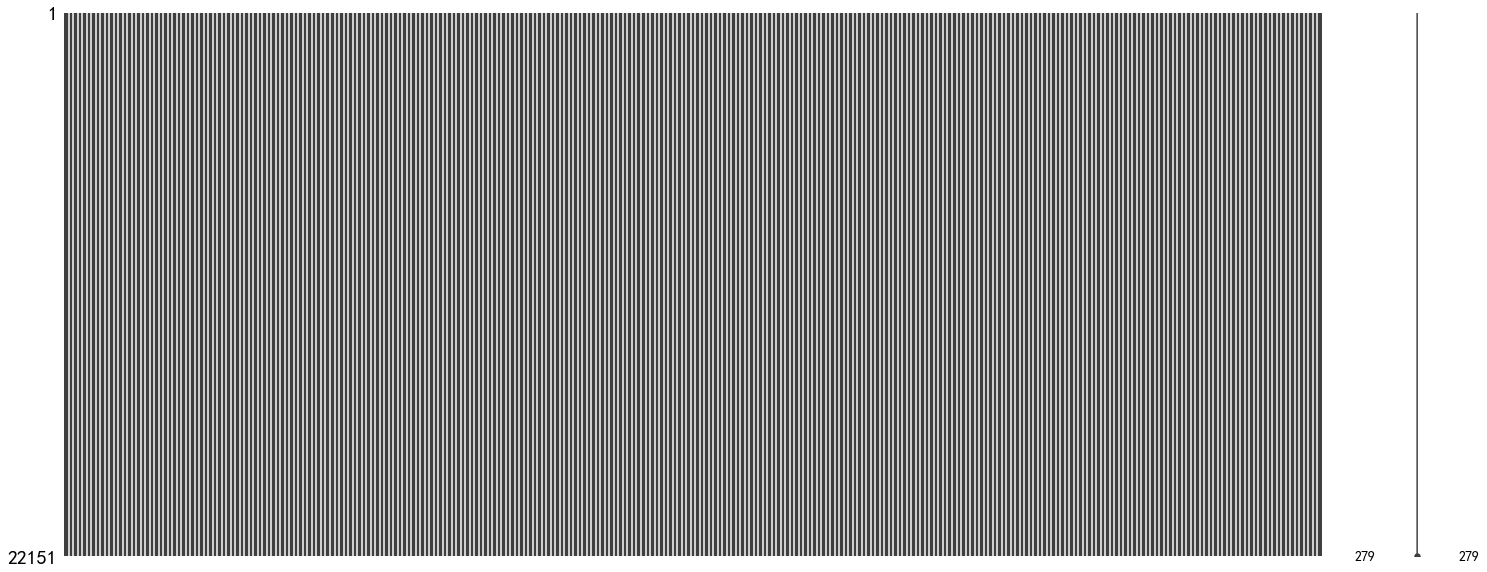

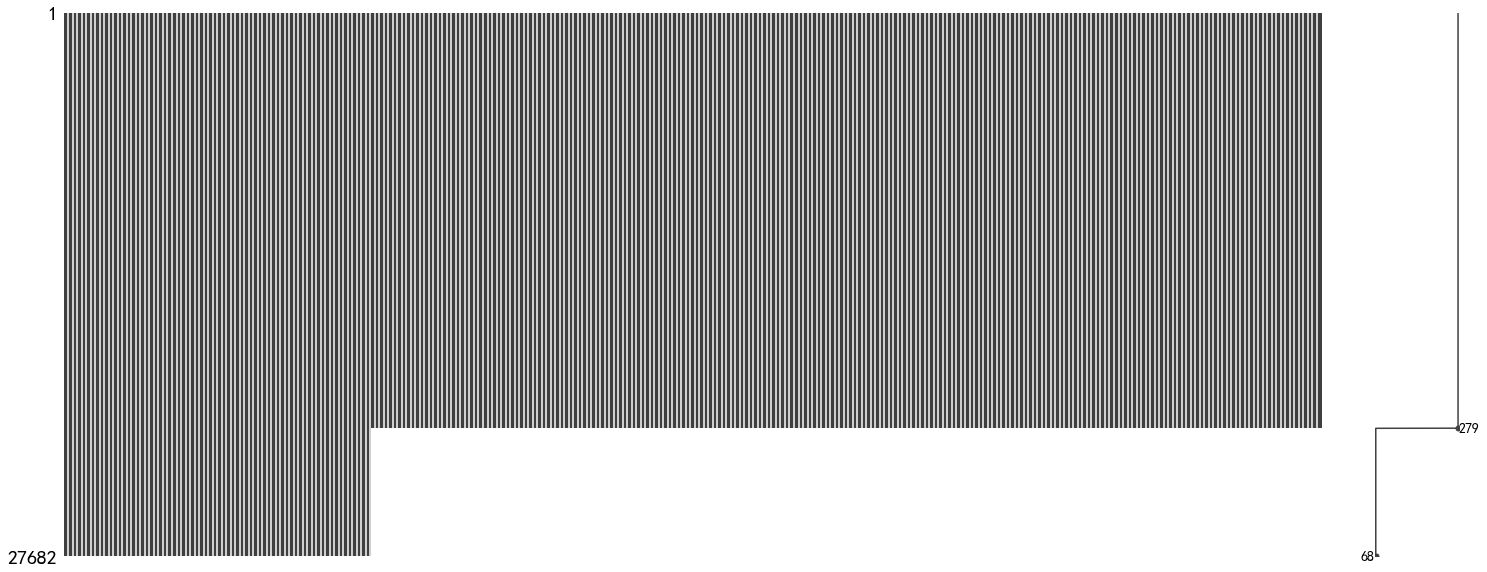

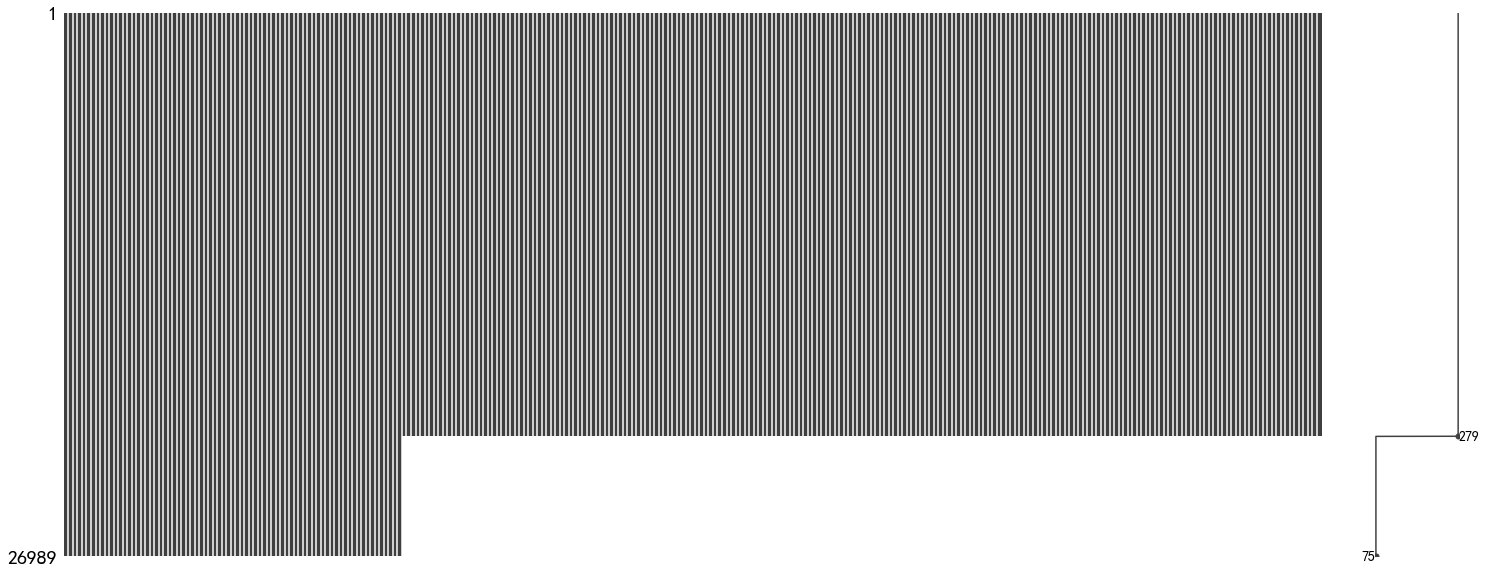

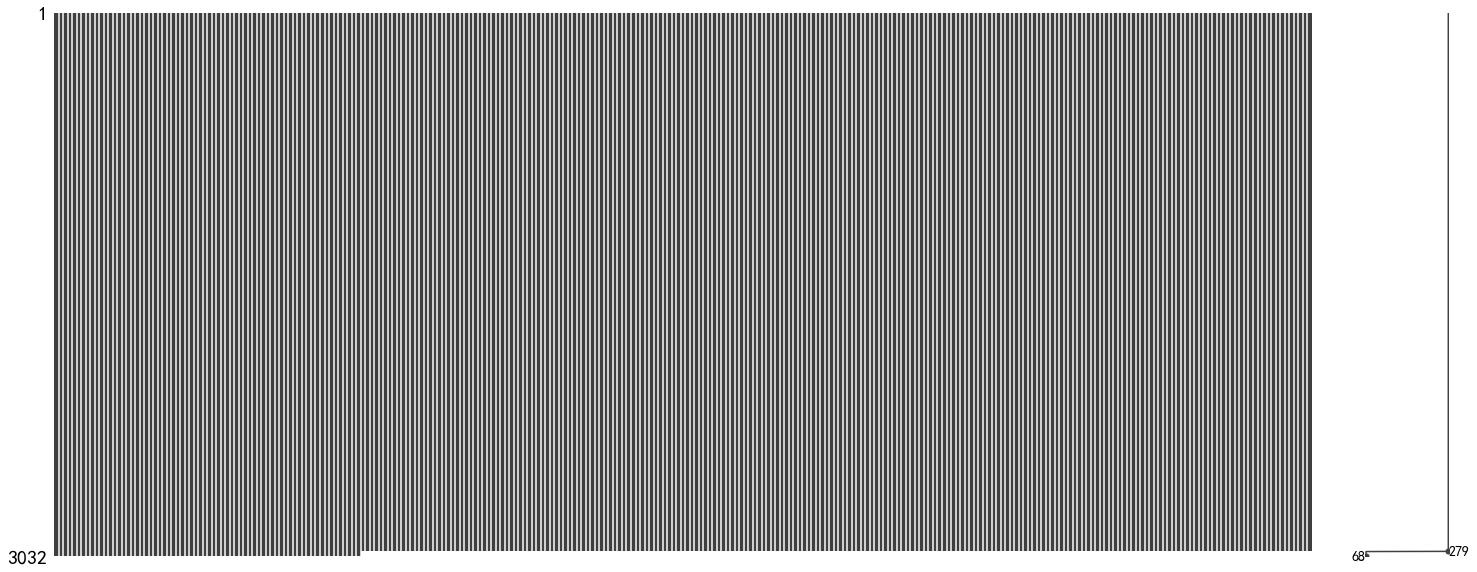

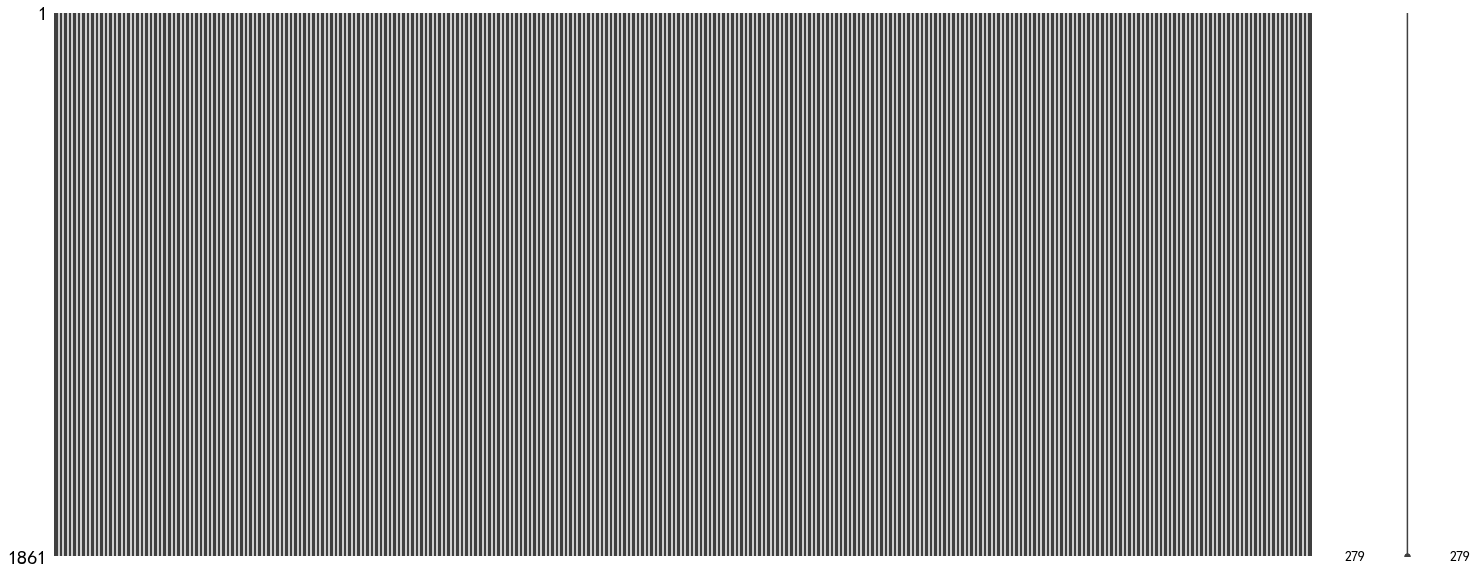

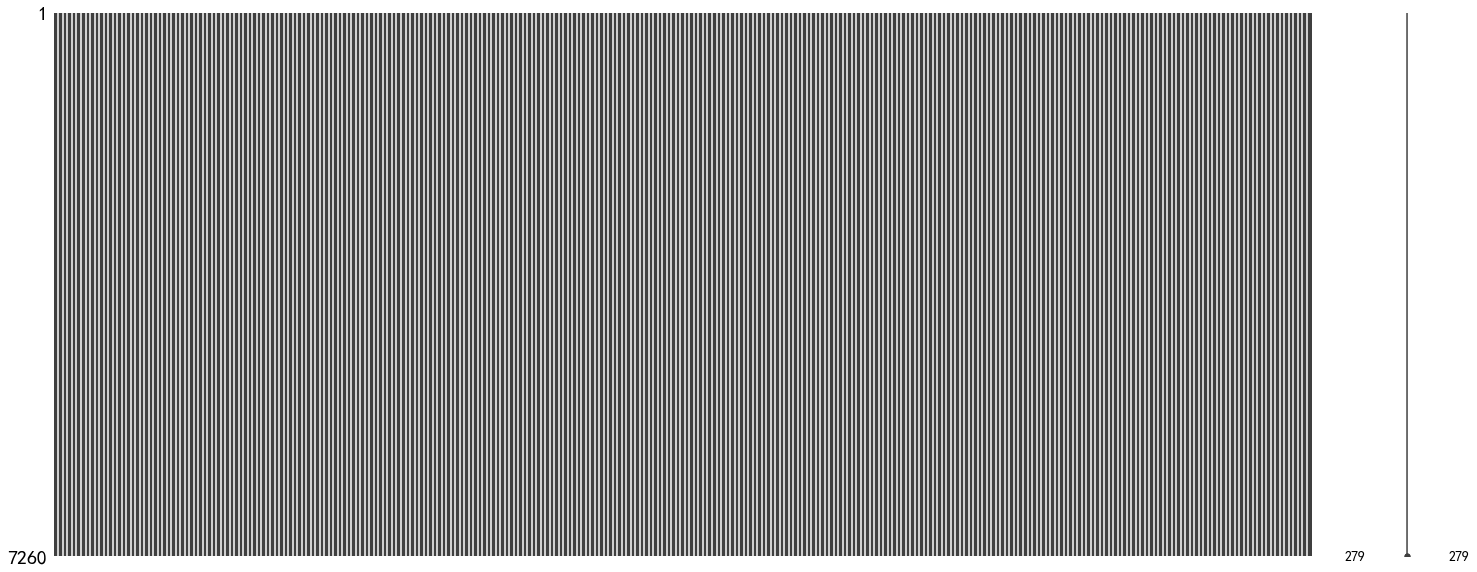

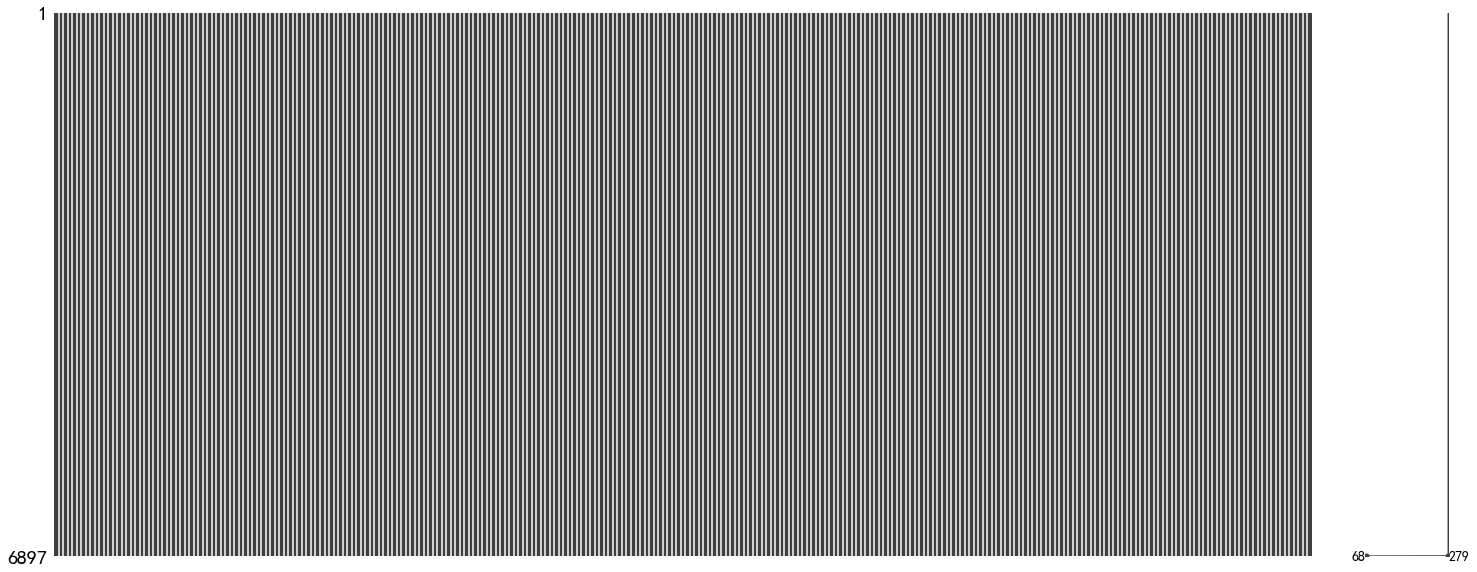

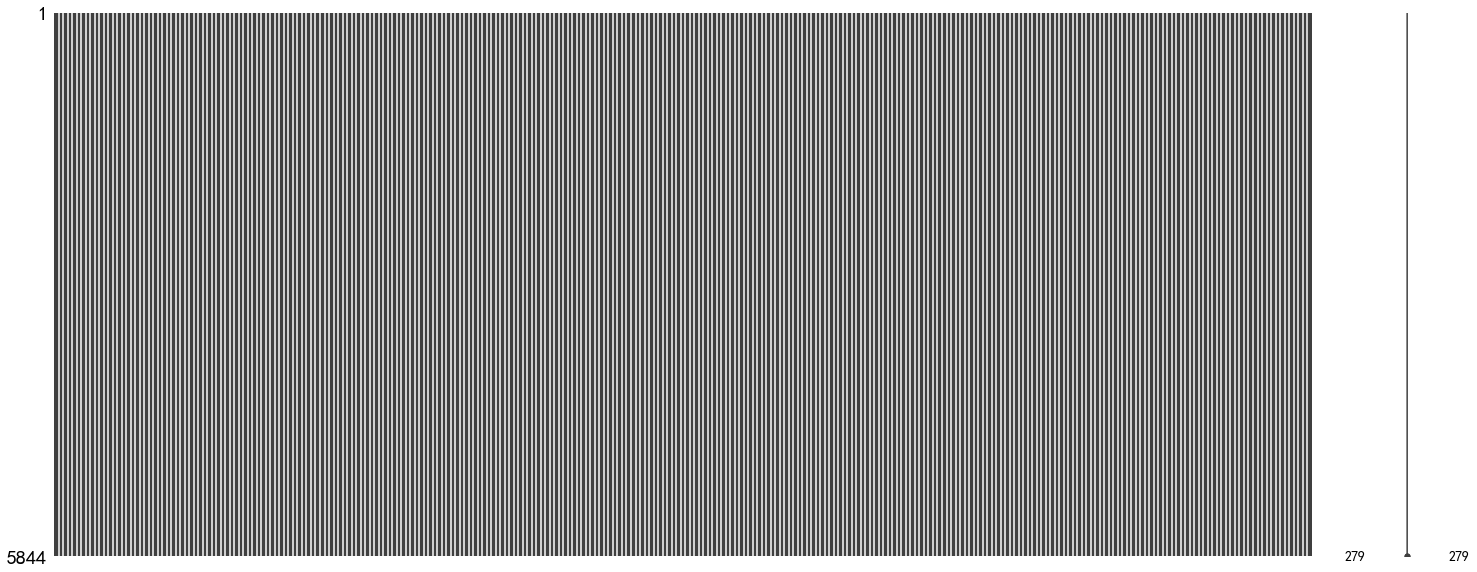

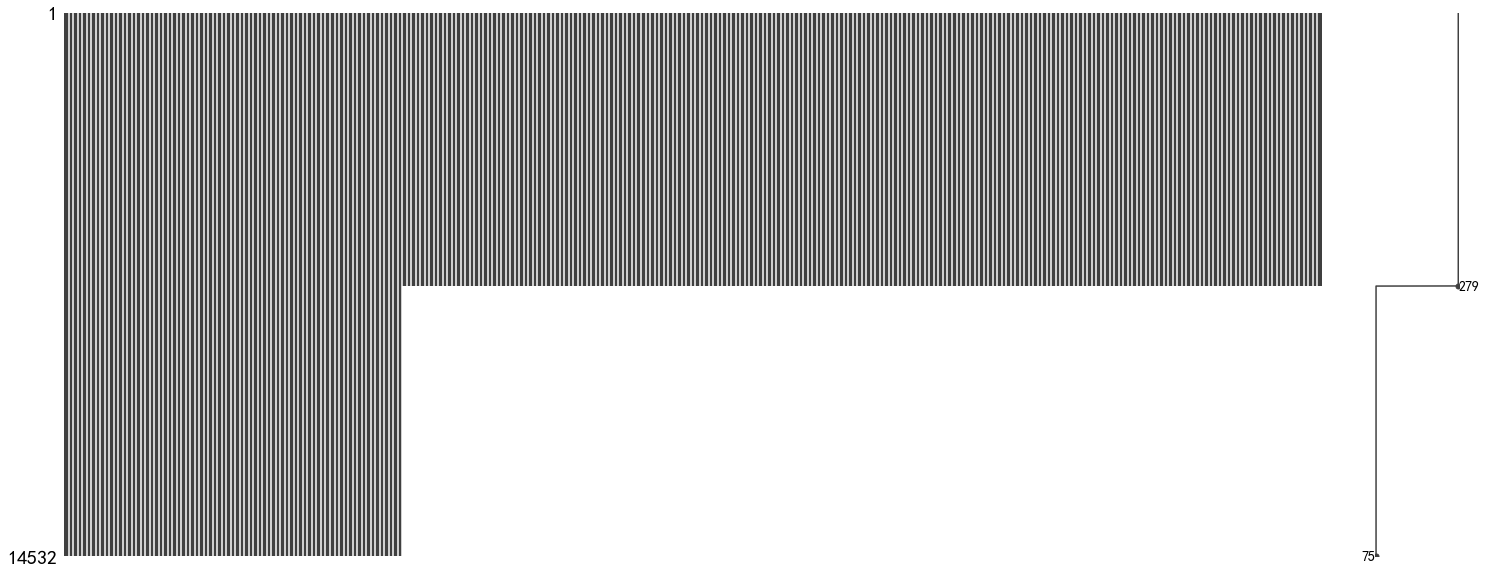

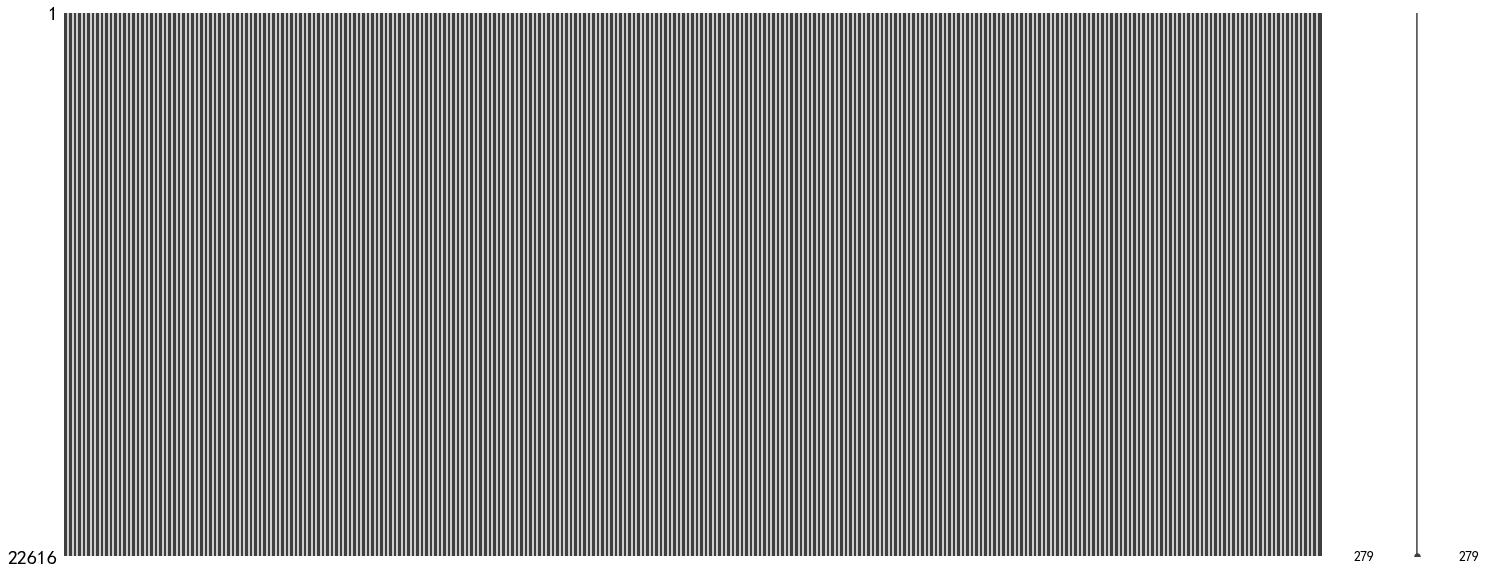

In [5]:
# 去除最大值等于最小值，也就是数据一直没有变化的情况
drop_columns = []
for column in data.columns:
    if data.loc[:,column].min() == data.loc[:,column].max():
        drop_columns.append(column) 
data_new = data.drop(drop_columns,axis=1)
print("去除无效数据后大小为：%d 行，%d 列" % (data_new.shape[0],data_new.shape[1]))
for day,startpoint in data_start_point_perday.items():
    print('='*50,'\n',day,'数据情况：')
    num = data_num_perday[day]
    msno.matrix(data_new.iloc[startpoint:startpoint+num,:])

Text(0.5, 1.0, '发动机转速')

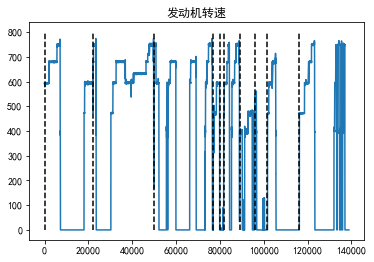

In [ ]:
x = range(data_new.shape[0])
plt.plot(x,data_new.iloc[:,1])
for key,value in data_start_point_perday.items():
    plt.plot([value,value],[0,800],'--k')
plt.title("发动机转速")

In [ ]:
data_new.head()

,T/C compressor Inlet Pre （Ambient Pre ）/ 压气机进口压力（大气压力） mbar,Engine speed / 发动机转速 1/min,Engine load / 发动机功率 kW,T/C compressor Outlet Pre / 压气机出口压力 bar,T/C compressor Outlet Temp / 压气机出口温度（空冷器进口温度）℃,Manifold Pressure / 进气总管压力（增压压力） kPa,Manifold Temp / 进气总管温度 ℃,A1 Cylinder Intake Air Temp / 第一缸进气温度 ℃,A6 Cylinder Intake Air Temp / 第六缸进气温度 ℃,T/C Turbine Inlet Pre / 涡前排气总管压力 bar,...,未命名 516,未命名 517,未命名 518,未命名 519,未命名 530,未命名 531,未命名 532,未命名 533,未命名 534,未命名 535
0,-0.228255,594.9,699.2,0.789410,56.5,75.3,30.0,27.6,11.5,0.509820,...,0.0,10.03,0.64,2.34,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.237153,595.1,700.8,0.785485,56.6,76.4,30.0,27.6,11.5,0.541635,...,0.0,10.06,0.64,2.34,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.225842,594.7,690.9,0.807606,57.2,78.5,30.0,27.6,11.5,0.507617,...,0.0,9.87,0.64,2.34,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.226071,594.7,690.9,0.803469,57.2,78.5,30.0,27.6,11.5,0.506234,...,0.0,9.90,0.64,2.34,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.230667,593.9,692.9,0.802300,57.4,78.9,30.0,27.6,11.5,0.536635,...,0.0,10.09,0.64,2.34,0.0,0.0,0.0,0.0,0.0,0.0


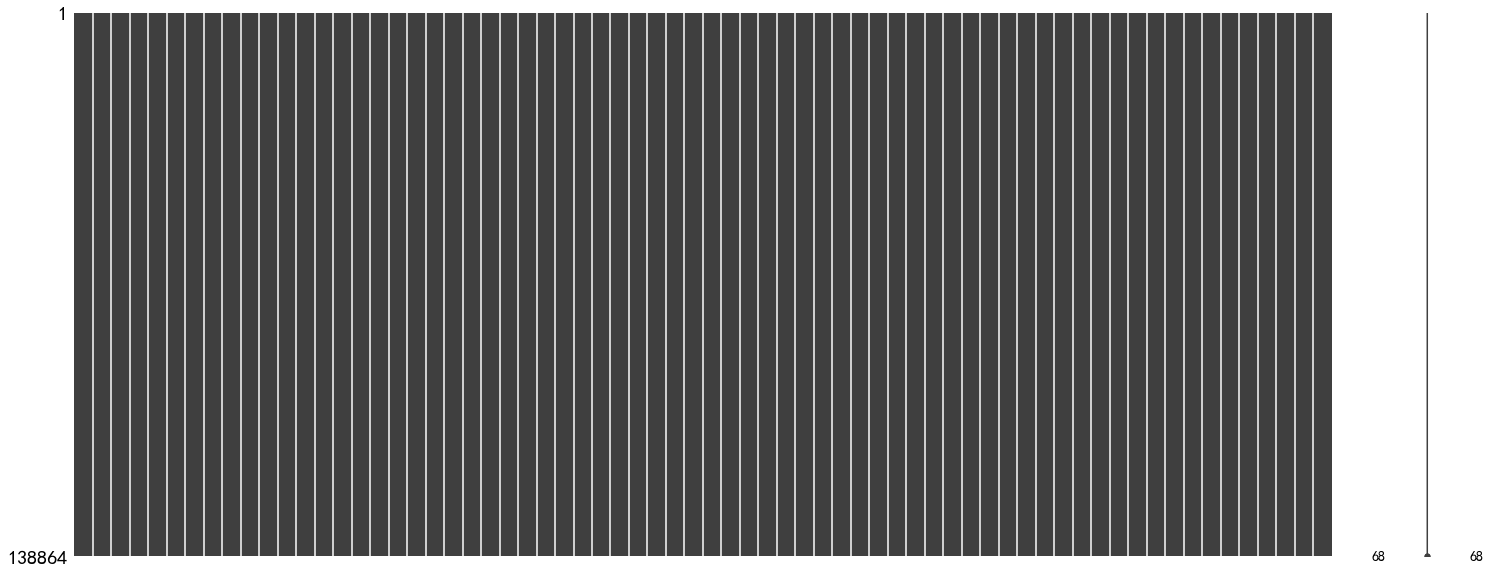

In [ ]:
msno.matrix(data_new.iloc[:,:68])

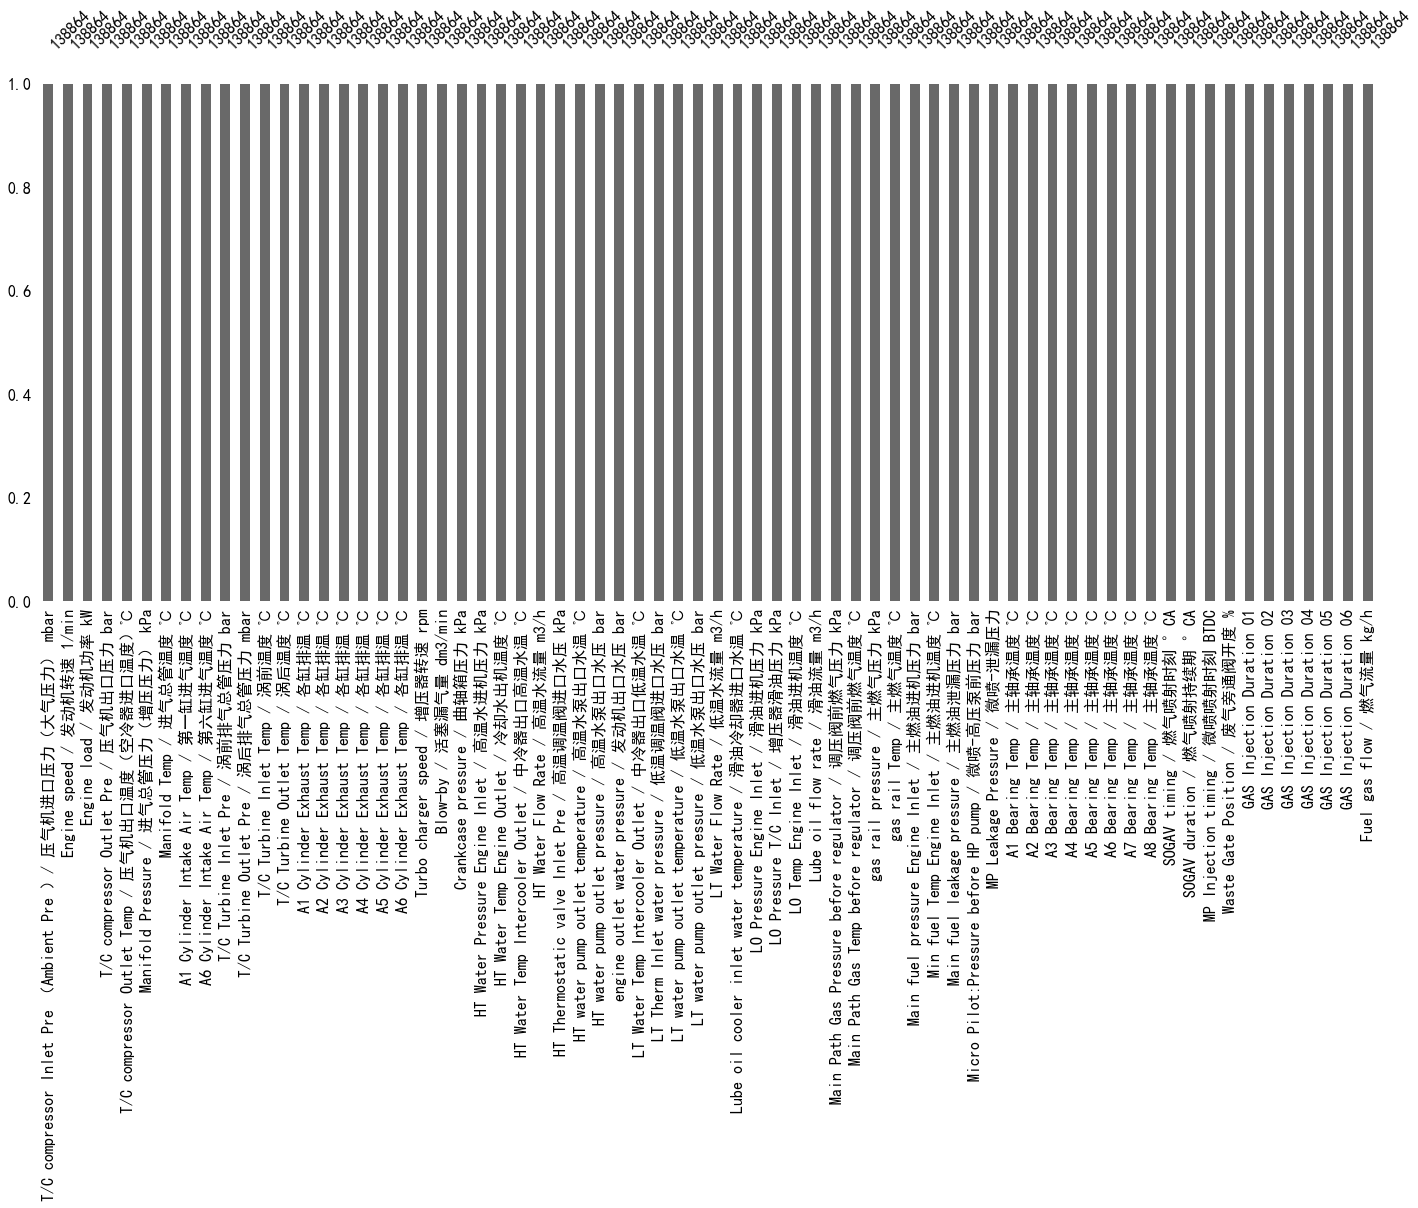

In [ ]:
msno.bar(data_new.iloc[:,:68])   # 到前68个数据无缺失值

In [ ]:
# 只保留筛选后的68个特征
data_new.iloc[:,:68].to_csv(r'dataset/newdata/newdata.csv',index=False)

In [2]:
import pandas as pd
data = pd.read_csv(r'dataset\newdata\newdata.csv')
data.head()

,T/C compressor Inlet Pre （Ambient Pre ）/ 压气机进口压力（大气压力） mbar,Engine speed / 发动机转速 1/min,Engine load / 发动机功率 kW,T/C compressor Outlet Pre / 压气机出口压力 bar,T/C compressor Outlet Temp / 压气机出口温度（空冷器进口温度）℃,Manifold Pressure / 进气总管压力（增压压力） kPa,Manifold Temp / 进气总管温度 ℃,A1 Cylinder Intake Air Temp / 第一缸进气温度 ℃,A6 Cylinder Intake Air Temp / 第六缸进气温度 ℃,T/C Turbine Inlet Pre / 涡前排气总管压力 bar,...,SOGAV duration / 燃气喷射持续期 °CA,MP Injection timing / 微喷喷射时刻 BTDC,Waste Gate Position / 废气旁通阀开度 %,GAS Injection Duration 01,GAS Injection Duration 02,GAS Injection Duration 03,GAS Injection Duration 04,GAS Injection Duration 05,GAS Injection Duration 06,Fuel gas flow / 燃气流量 kg/h
0,-0.228255,594.9,699.2,0.789410,56.5,75.3,30.0,27.6,11.5,0.509820,...,0.0,354.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.380963
1,-0.237153,595.1,700.8,0.785485,56.6,76.4,30.0,27.6,11.5,0.541635,...,0.0,354.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.103895
2,-0.225842,594.7,690.9,0.807606,57.2,78.5,30.0,27.6,11.5,0.507617,...,0.0,354.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.826826
3,-0.226071,594.7,690.9,0.803469,57.2,78.5,30.0,27.6,11.5,0.506234,...,0.0,354.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.413560
4,-0.230667,593.9,692.9,0.802300,57.4,78.9,30.0,27.6,11.5,0.536635,...,0.0,354.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.875721


In [ ]:
d_d_list = []
columns = ['date','s_point','e_point','d_length']
for day,dsp in data_start_point_perday.items():
    d_d_list.append([day,dsp,dsp+data_num_perday[day]-1,data_num_perday[day]])    
data_details = pd.DataFrame(d_d_list,columns=columns)
data_details.to_csv(r'dataset/newdata/data_details.csv',index=False)

In [3]:
data_details = pd.read_csv(r'dataset\newdata\data_details.csv')
data_details

,date,s_point,e_point,d_length
0,20181219,0,22150,22151
1,20181220,22151,49832,27682
2,20181221,49833,76821,26989
3,20181227,76822,79853,3032
4,20181229,79854,81714,1861
5,20190102,81715,88974,7260
6,20190124,88975,95871,6897
7,20190125,95872,101715,5844
8,20190128,101716,116247,14532
9,20190130,116248,138863,22616


# 数据降维分析

In [4]:
# 数据标准化
data_norm = (data-data.mean())/data.std()

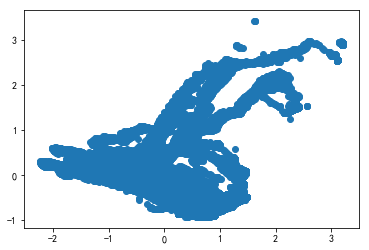

In [ ]:
from sklearn.decomposition import PCA
DIMENSION = 2   # 定义目标维度
colors = ['b','k','m','g','r','y',\
          'lightpink','peru','mediumslateblue','orange']
pca = PCA(n_components=DIMENSION)   # 使用PCA将数据降至10维
data_2_XD = pca.fit_transform(data_norm)
data_2_XD = (data_2_XD-data_2_XD.mean())/data_2_XD.std()
plt.figure()
plt.scatter(data_2_XD[:,0],data_2_XD[:,1])

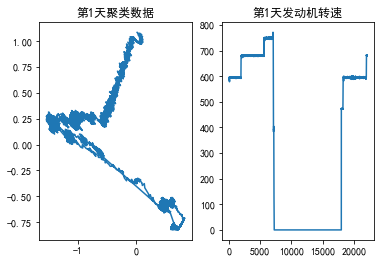

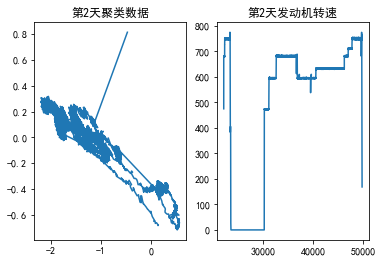

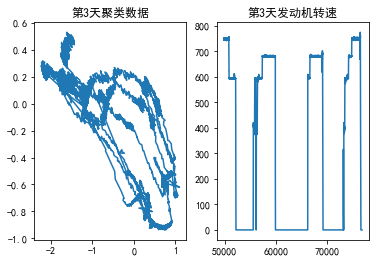

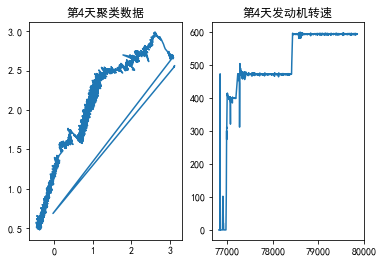

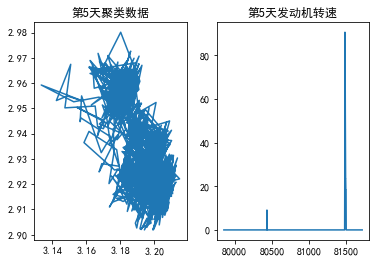

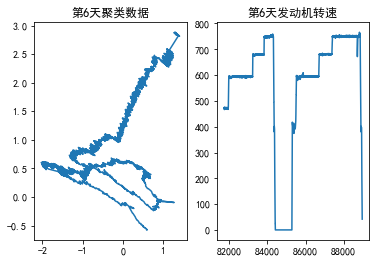

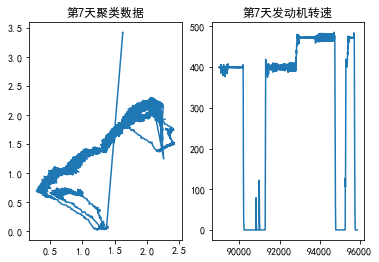

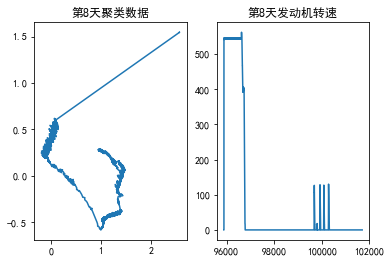

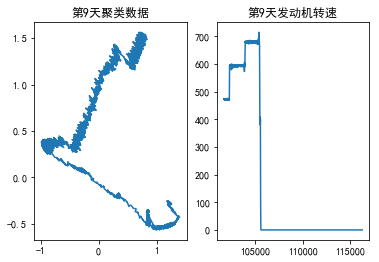

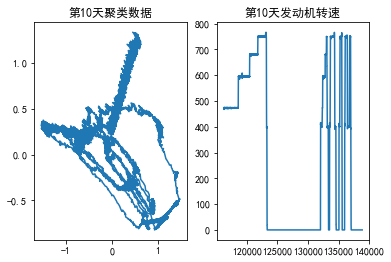

In [ ]:
for i in range(data_details.shape[0]):
    s_point = data_details.iloc[i,1]
    e_point = data_details.iloc[i,2]
    plt.figure(i)
    plt.subplot(121)
    plt.plot(data_2_XD[s_point:e_point,0], data_2_XD[s_point:e_point,1])
    plt.title('第{}天聚类数据'.format(i+1))
    plt.subplot(122)
    plt.plot(data.iloc[s_point:e_point,1])
    plt.title('第{}天发动机转速'.format(i+1))

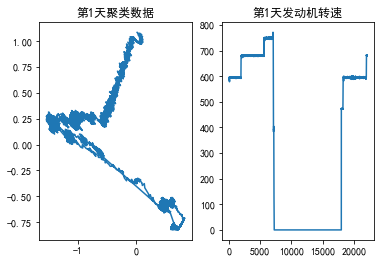

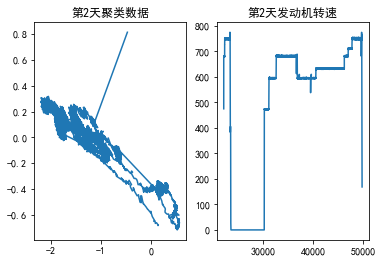

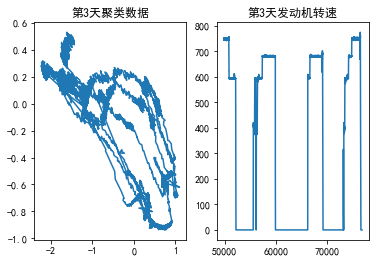

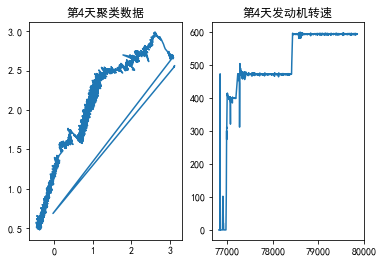

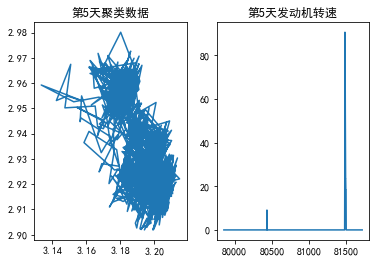

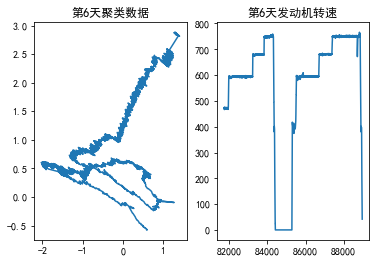

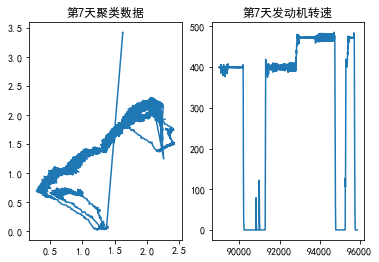

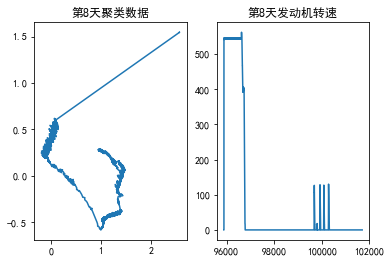

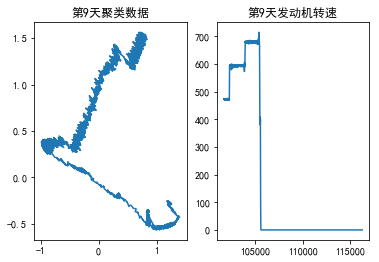

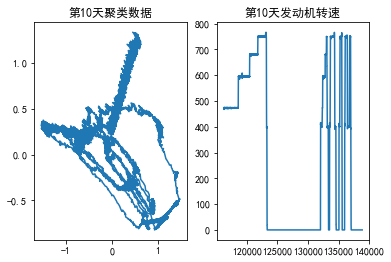

In [ ]:
from sklearn.decomposition import KernelPCA
rbf_pca = KernelPCA(n_components=DIMENSION,kernel='rbf',gamma=0.04)
data_2_XD_rbf = pca.fit_transform(data_norm)
data_2_XD_rbf = (data_2_XD_rbf-data_2_XD_rbf.mean())/data_2_XD_rbf.std()
for i in range(data_details.shape[0]):
    s_point = data_details.iloc[i,1]
    e_point = data_details.iloc[i,2]
    plt.figure(i)
    plt.subplot(121)
    plt.plot(data_2_XD_rbf[s_point:e_point,0], data_2_XD_rbf[s_point:e_point,1])
    plt.title('第{}天聚类数据'.format(i+1))
    plt.subplot(122)
    plt.plot(data.iloc[s_point:e_point,1])
    plt.title('第{}天发动机转速'.format(i+1))

In [5]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline
tsne = TSNE(n_components=2, init='pca', random_state=0)
data_2_XD_tsne = tsne.fit_transform(data_norm)
data_2_XD_tsne = (data_2_XD_tsne-data_2_XD_tsne.mean())/data_2_XD_tsne.std()


NameError: name 'data_2_XD_rbf' is not defined

<Figure size 432x288 with 0 Axes>

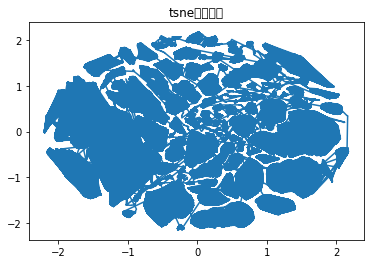

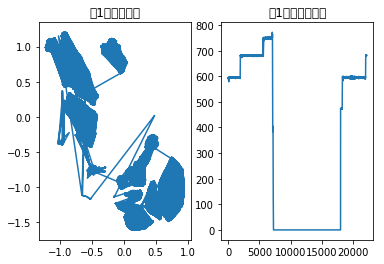

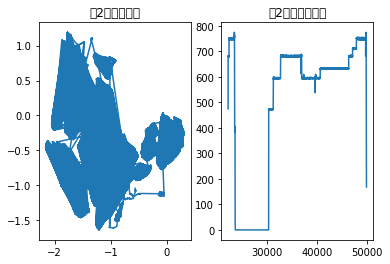

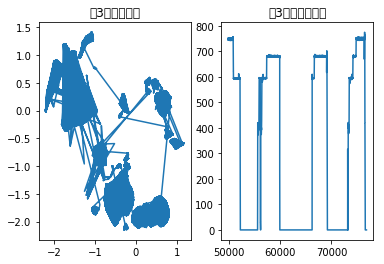

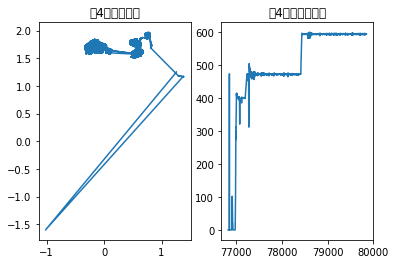

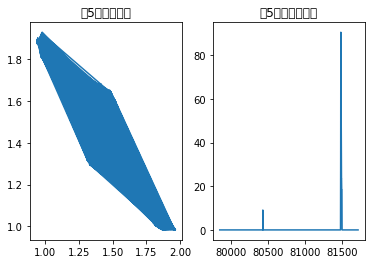

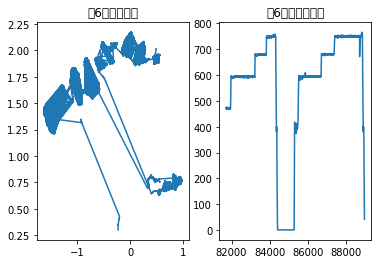

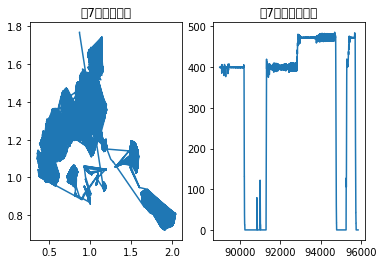

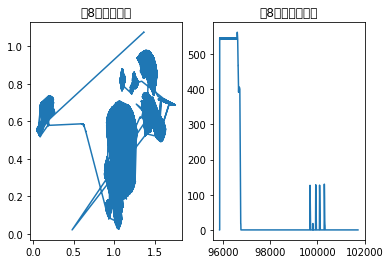

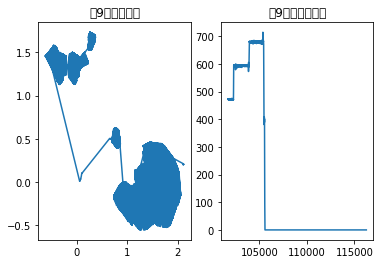

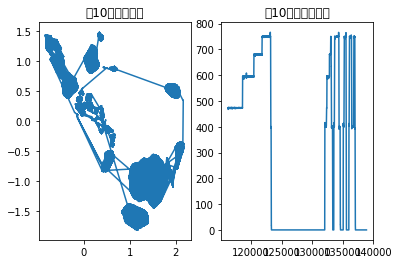

In [6]:
plt.figure(0)
plt.plot(data_2_XD_tsne[:,0], data_2_XD_tsne[:,1])
plt.title('tsne聚类结果')
for i in range(data_details.shape[0]):
    s_point = data_details.iloc[i,1]
    e_point = data_details.iloc[i,2]
    plt.figure(i+1)
    plt.subplot(121)
    plt.plot(data_2_XD_tsne[s_point:e_point,0], data_2_XD_tsne[s_point:e_point,1])
    plt.title('第{}天聚类数据'.format(i+1))
    plt.subplot(122)
    plt.plot(data.iloc[s_point:e_point,1])
    plt.title('第{}天发动机转速'.format(i+1))